<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/automl_may2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2021/train.csv
/kaggle/input/tabular-playground-series-apr-2021/test.csv
/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2021/train.csv
/kaggle/input/tabular-playground-series-may-2021/test.csv


<h1 style="background-color:LimeGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> Version 1 to 5 : Tabular Playground Apr </h1>
<h1 style="background-color:LimeGreen; font-family:newtimeroman; font-size:100%; text-align:left;"> Version 6 : Tabular Playground May </h1>

<h2 style=color:green align="left"> Table of Contents </h2>

#### 1) Introduction to EvalML
#### 2) Load Required Libraries
#### 3) Read Data
#### 4) EDA (Exploratory Data Analysis)
#### 5) EvalML (AutoML)

<h1 style='background-color:magenta; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > 1) Introduction to EvalML </h1>

- **EvalML** is an AutoML library which builds, optimizes, and evaluates machine learning pipelines using domain-specific objective functions.

#### Key Functionality

- **Automation**: Makes machine learning easier. Avoid training and tuning models by hand. Includes data quality checks, cross-validation and more.

- **Data Checks**: Catches and warns of problems with your data and problem setup before modeling.

- **End-to-end**: Constructs and optimizes pipelines that include state-of-the-art preprocessing, feature engineering, feature selection, and a variety of modeling techniques.

- **Model Understanding**: Provides tools to understand and introspect on models, to learn how they'll behave in your problem domain.

- **Domain-specific**: Includes repository of domain-specific objective functions and an interface to define your own.

### Reference:
 - https://github.com/alteryx/evalml
 - https://github.com/alteryx/evalml
 - https://evalml.alteryx.com/en/stable/install.html

<h1 style='background-color:magenta; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 10px;' > 2) Load Required Libraries </h1>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

<h1 style='background-color:magenta; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > 3) Read Data </h1>

In [2]:
from google.colab import drive
drive.mount('/ashok')

Mounted at /ashok


In [4]:
# Check
with open('/ashok/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/ashok/My Drive/foo.txt'

Hello Google Drive!

In [5]:
train = pd.read_csv('/ashok/MyDrive/Colab_data_files/may2021/train.csv')
test = pd.read_csv('/ashok/MyDrive/Colab_data_files/may2021/test.csv')
sub = pd.read_csv('/ashok/MyDrive/Colab_data_files/may2021/sample_submission.csv')

In [6]:
display(train.head(3))
display(test.head(3))
display(sub.head(3))

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0


,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25


In [7]:
display(train.shape)
print("--------"*5)
display(test.shape)

(100000, 52)

----------------------------------------


(50000, 51)

In [8]:
train.sample(10)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
27045,27045,0,0,1,3,0,0,0,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11,2,3,1,0,0,0,0,0,0,0,2,0,4,0,2,0,0,0,1,0,0,0,Class_3
27371,27371,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,3,0,30,0,0,0,0,0,0,0,Class_2
30109,30109,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,14,0,0,1,0,0,0,0,Class_2
55703,55703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,6,1,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,Class_2
35617,35617,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,Class_2
97537,97537,3,0,0,0,2,0,0,1,0,0,0,0,1,0,26,0,0,2,2,1,0,2,0,0,1,0,0,1,0,0,0,4,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0,1,0,3,Class_2
42465,42465,0,0,0,0,0,0,0,22,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,Class_1
11570,11570,0,0,0,0,0,0,0,0,15,3,1,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,0,0,2,1,0,0,0,0,0,1,0,0,0,47,0,0,0,0,0,0,1,0,0,0,Class_2
98219,98219,0,0,0,0,0,0,6,0,0,0,0,0,0,0,5,1,0,0,3,2,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,23,0,0,1,0,0,0,4,0,3,0,0,0,0,1,Class_2
75676,75676,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,2,0,1,0,0,0,0,0,0,0,Class_2


In [9]:
display(train.info())
print('-'*80)
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

None

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          50000 non-null  int64
 1   feature_0   50000 non-null  int64
 2   feature_1   50000 non-null  int64
 3   feature_2   50000 non-null  int64
 4   feature_3   50000 non-null  int64
 5   feature_4   50000 non-null  int64
 6   feature_5   50000 non-null  int64
 7   feature_6   50000 non-null  int64
 8   feature_7   50000 non-null  int64
 9   feature_8   50000 non-null  int64
 10  feature_9   50000 non-null  int64
 11  feature_10  50000 non-null  int64
 12  feature_11  50000 non-null  int64
 13  feature_12  50000 non-null  int64
 14  feature_13  50000 non-null  int64
 15  feature_14  50000 non-null  int64
 16  feature_15  50000 non-null  int64
 17  feature_16  50000 non-null  int64
 18  feature_17  50000 non-nul

None

<h1 style='background-color:magenta; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > 4) EDA (Exploratory Data Analysis) </h1>

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 4.1) Missing values </h1>

In [13]:
print("Missing Values in Train:\n\n", train.isnull().sum())
print("\n\nMissing Values in Test:\n\n", test.isnull().sum())
train.isnull().sum().sum()

Missing Values in Train:

 id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
target        0
dtype: int64


Missing Values in Test:

 id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feat

0

In [11]:
display(train.describe().T)
display(test.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,100000.0,49999.50000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
feature_0,100000.0,0.25783,0.929033,0.0,0.00,0.0,0.00,10.0
feature_1,100000.0,0.43172,1.977862,0.0,0.00,0.0,0.00,31.0
feature_2,100000.0,0.11413,0.519584,0.0,0.00,0.0,0.00,6.0
feature_3,100000.0,0.59055,1.844558,0.0,0.00,0.0,0.00,26.0
feature_4,100000.0,0.59977,2.785531,0.0,0.00,0.0,0.00,38.0
feature_5,100000.0,0.16082,0.601149,0.0,0.00,0.0,0.00,10.0
feature_6,100000.0,0.73149,2.343465,0.0,0.00,0.0,0.00,27.0
feature_7,100000.0,1.22892,2.692732,0.0,0.00,0.0,1.00,31.0
feature_8,100000.0,0.90335,3.415258,0.0,0.00,0.0,0.00,39.0


,count,mean,std,min,25%,50%,75%,max
id,50000.0,124999.50000,14433.901067,100000.0,112499.75,124999.5,137499.25,149999.0
feature_0,50000.0,0.25462,0.910607,0.0,0.00,0.0,0.00,10.0
feature_1,50000.0,0.44348,2.004536,0.0,0.00,0.0,0.00,31.0
feature_2,50000.0,0.11672,0.524807,0.0,0.00,0.0,0.00,6.0
feature_3,50000.0,0.58444,1.814083,0.0,0.00,0.0,0.00,25.0
feature_4,50000.0,0.61264,2.819580,0.0,0.00,0.0,0.00,38.0
feature_5,50000.0,0.16150,0.605760,0.0,0.00,0.0,0.00,9.0
feature_6,50000.0,0.74600,2.352495,0.0,0.00,0.0,0.00,25.0
feature_7,50000.0,1.23804,2.728055,0.0,0.00,0.0,1.00,29.0
feature_8,50000.0,0.88644,3.364154,0.0,0.00,0.0,0.00,35.0


In [12]:
train['target'].value_counts()

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

### Visualize missing values (NaN) values using Missingno Library

 a) Visualize missing values as a matrix
 
 b) Visualize missing values as a barplot
 
 c) Visualize missing values as a heatmap
 
 d) Visualize missing values as a dendrogram

In [ ]:
import missingno as msno

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 4.2) Visualize missing values as a matrix </h1>

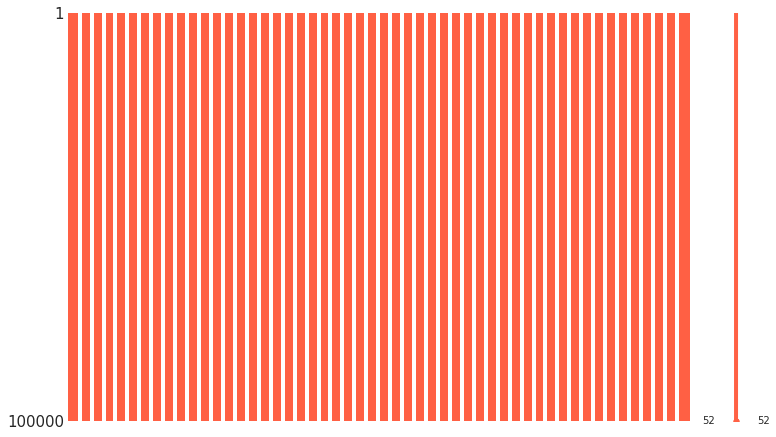

In [ ]:
# Visualize missing values as a matrix
# msno.matrix(train,figsize=(11,7), sparkline=False, fontsize=12, color=(0.27, 0.52, 1.0));
# msno.matrix(train,figsize=(11,7), sparkline=False, fontsize=12, color=(0,.3,.3));
msno.matrix(train,figsize=(11,7), fontsize=12, color=(1, 0.38, 0.27));

#### a) Install EvalML (AutoML)
#### b) Configure search
#### c) Pipeline Rankings
#### d) Get pipeline
#### e) Select Best pipeline
#### f) Describe pipeline
#### g) Access raw results

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.1) Install EvalML (AutoML) </h1>

In [15]:
!pip install evalml

     |████████████████████████████████| 6.2MB 17.4MB/s 
     |████████████████████████████████| 6.7MB 22.0MB/s 
     |████████████████████████████████| 22.3MB 51.0MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 1.8MB 43.3MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 358kB 47.9MB/s 
     |████████████████████████████████| 10.3MB 30.6MB/s 
     |████████████████████████████████| 296kB 48.5MB/s 
     |████████████████████████████████| 215kB 55.7MB/s 
     |████████████████████████████████| 13.2MB 32.9MB/s 
     |████████████████████████████████| 5.7MB 24.3MB/s 
     |████████████████████████████████| 79.9MB 111kB/s 
     |████████████████████████████████| 307kB 47.6MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 67.3MB 124kB/s 
     |████████████████████████████████| 9.5MB 15.9MB/s 
     |████████████████████████████████| 1.5MB 16.

In [ ]:
import evalml

In [ ]:
X = train.drop(columns=['target'])
y = train['target']

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary', test_size=.2)

# binary classification --> problem_type='binary'
# multi classification --> problem_type='multiclass'

X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='multiclass')

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.2) Configure search </h1>

In [ ]:
# automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
# automl = AutoMLSearch(X_train = X_train, y_train = y_train, problem_type='binary', max_batches=1, optimize_thresholds=True)

# objective="F1"              --> Binary Classification
# objective="F1 Micro"        --> Multiclass Classification  --> using micro averaging
# objective="F1 Macro"        --> Multiclass Classification  --> using macro averaging
# objective="F1 Weighted"     --> Multiclass Classification  --> using Weighted averaging

from evalml import AutoMLSearch

automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type="multiclass", objective="F1 Micro", 
                      allowed_model_families=['random_forest' , 'xgboost', 'lightgbm'],
                      additional_objectives=None, max_batches=5)
automl.search()

Generating pipelines to search over...



*****************************
* Beginning pipeline search *
*****************************

Optimizing for F1 Micro. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 5 batches for a total of 24 pipelines. 
Allowed model families: xgboost, random_forest, lightgbm



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Multiclass Classification Pipeline
Mode Baseline Multiclass Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.575

*****************************
* Evaluating Batch Number 1 *
*****************************

Random Forest Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.576
LightGBM Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.561
XGBoost Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.566

*****************************
* Evaluating Batch Number 2 *
*****************************

Random Forest Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation - mean F1 Micro: 0.575
Random Forest Classifier w/ Imputer + Undersampler:
	Starting cross validation
	Finished cross validation

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.3) Pipeline Rankings </h1>

In [ ]:
automl.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,20,Random Forest Classifier w/ Imputer + Undersam...,0.576337,0.000699,0.577080,0.13625,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,13,XGBoost Classifier w/ Imputer + Undersampler,0.576138,0.000613,0.576518,0.11625,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,16,LightGBM Classifier w/ Imputer + Undersampler,0.575538,0.000430,0.575880,0.05625,False,{'Imputer': {'categorical_impute_strategy': 'm...
11,0,Mode Baseline Multiclass Classification Pipeline,0.574975,0.000009,0.574980,0.00000,False,{'Baseline Classifier': {'strategy': 'mode'}}


<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.4) Get pipeline </h1>

In [ ]:
# We can get the object of any pipeline via their id as well:
pipeline = automl.get_pipeline(1)
print('Name:\n',pipeline.name)
print('\n\nParameters:\n\n', pipeline.parameters)

Name:
 Random Forest Classifier w/ Imputer + Undersampler


Parameters:

 {'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler': {'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1}, 'Random Forest Classifier': {'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}


<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.5) Select Best pipeline </h1>

In [ ]:
best_pipeline = automl.best_pipeline
best_pipeline

MulticlassClassificationPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Undersampler':{'sampling_ratio': 0.25, 'min_samples': 100, 'min_percentage': 0.1}, 'Random Forest Classifier':{'n_estimators': 971, 'max_depth': 10, 'n_jobs': -1},})

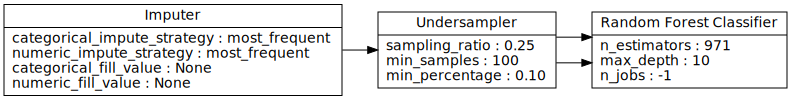

In [ ]:
# We can also visualize the structure of our pipeline
best_pipeline.graph()

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.6) Describe pipeline </h1>

- Each **pipeline is given an id.** We can get more information about any **particular pipeline** using that id. Here, we will get more information about the **pipeline with id = 1.**

In [ ]:
automl.describe_pipeline(3)


************************************************
* XGBoost Classifier w/ Imputer + Undersampler *
************************************************

Problem Type: multiclass
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
3. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100

Training
Training for multiclass problems.
Total training time (including CV): 76.2 seconds

Cross Validation
----------------
             F1 Micro  MCC Multiclass  Log Loss Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision Micro  F1 Weighted  F1 Macro  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0               0.566           0.094                1.134      

#### If we are interested in see more details about the pipeline, we can describe it using the id from the rankings table:

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


******************************************************
* Random Forest Classifier w/ Imputer + Undersampler *
******************************************************

Problem Type: multiclass
Model Family: Random Forest

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
3. Random Forest Classifier
	 * n_estimators : 971
	 * max_depth : 10
	 * n_jobs : -1

Training
Training for multiclass problems.
Total training time (including CV): 76.1 seconds

Cross Validation
----------------
             F1 Micro  MCC Multiclass  Log Loss Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision Micro  F1 Weighted  F1 Macro  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0               0.577           0.062          

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:170%; text-align:left;' > 5.7) Access raw results </h1>

- The **AutoMLSearch** class records detailed results information under the results field, including information about the **cross-validation scoring and parameters.**

In [ ]:
automl.results

{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mode Baseline Multiclass Classification Pipeline',
   'pipeline_class': evalml.pipelines.multiclass_classification_pipeline.MulticlassClassificationPipeline,
   'pipeline_summary': 'Baseline Classifier',
   'parameters': {'Baseline Classifier': {'strategy': 'mode'}},
   'mean_cv_score': 0.574974999867178,
   'standard_deviation_cv_score': 9.202176211129387e-06,
   'high_variance_cv': False,
   'training_time': 3.400686740875244,
   'cv_data': [{'all_objective_scores': OrderedDict([('F1 Micro',
                   0.5749803127460906),
                  ('MCC Multiclass', 0.0),
                  ('Log Loss Multiclass', 14.679659941497645),
                  ('AUC Weighted', 0.5),
                  ('AUC Macro', 0.5),
                  ('AUC Micro', 0.716653541830727),
                  ('Precision Weighted', 0.33060236004559224),
                  ('Precision Macro', 0.14374507818652266),
                  ('Precision Micro', 0.57498

In [ ]:
# Evaluate on the test data
scores = best_pipeline.score(X_test, y_test, objectives=evalml.objectives.get_core_objectives('multiclass'))
print(f'Accuracy Binary: {scores["F1 Micro"]}')                                                                                              

Accuracy Binary: 0.5763


best_pipeline = automl.best_pipeline
best_pipeline.fit(X_train,y_train)
prediction = best_pipeline.predict(test)

In [ ]:
best_pipeline.fit(X_train, y_train)
predictions_X_test = best_pipeline.predict(X_test)

In [ ]:
predictions_test = best_pipeline.predict(test)

check_model = automl.load('model'.pkl)
check_model.predict_proba(X_test).to_dataframe()

from evalml.model_understanding.graphs import (
    graph_prediction_vs_actual, 
    #graph_feature_importance, 
    graph_confusion_matrix
)

graph_prediction_vs_actual(best_pipeline, X_test, y_test, "F1 Micro")

<h2 style=color:green align="left"> 5.7.1) Feature Importance </h2>

In [ ]:
# graph_permutation_importance(best_pipeline, X_test, y_test, "F1")
best_pipeline.graph_feature_importance(importance_threshold=0)

<h2 style=color:green align="left"> 5.7.2) Confusion Matrix </h2>

In [ ]:
graph_confusion_matrix(y_test, predictions_X_test)

NameError: name 'graph_confusion_matrix' is not defined

from evalml.objectives.standard_metrics import AccuracyBinary, AUC, F1, PrecisionWeighted, Recall

#acc = AccuracyBinary()
auc = AUC()
f1 = F1()
pre_w = PrecisionWeighted()
rec = Recall()

print(f"Accuracy (Binary): {acc.score(y_true=y_test, y_predicted=predictions)}")
print(f"Area Under Curve: {auc.score(y_true=y_test, y_predicted=predictions)}")
print(f"F1: {f1.score(y_true=y_test, y_predicted=predictions)}")
print(f"Precision (Weighted): {pre_w.score(y_true=y_test, y_predicted=predictions)}")
print(f"Recall: {rec.score(y_true=y_test, y_predicted=predictions)}")

<h1 style='background-color:LimeGreen; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;' > Submission </h1>

In [ ]:
sub['Survived'] = predictions_test.to_series()
sub.to_csv('submission.csv',index=False)
sub.head()

,id,Class_1,Class_2,Class_3,Class_4,Survived
0,100000,0.25,0.25,0.25,0.25,Class_2
1,100001,0.25,0.25,0.25,0.25,Class_2
2,100002,0.25,0.25,0.25,0.25,Class_2
3,100003,0.25,0.25,0.25,0.25,Class_2
4,100004,0.25,0.25,0.25,0.25,Class_2
